# ARIMA

## 1. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# mengganti tema plot menjadi dark
import os
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline

## 2. Data

In [2]:
data = pd.read_csv('tongkol.csv', index_col='Produksi Hasil Tangkap Laut', parse_dates=True)
data.index.freq = 'MS'
data

,Tongkol
Produksi Hasil Tangkap Laut,
2017-01-01,46.12
2017-02-01,46.23
2017-03-01,45.53
2017-04-01,45.21
2017-05-01,46.32
2017-06-01,46.65
2017-07-01,45.71
2017-08-01,46.23
2017-09-01,46.44


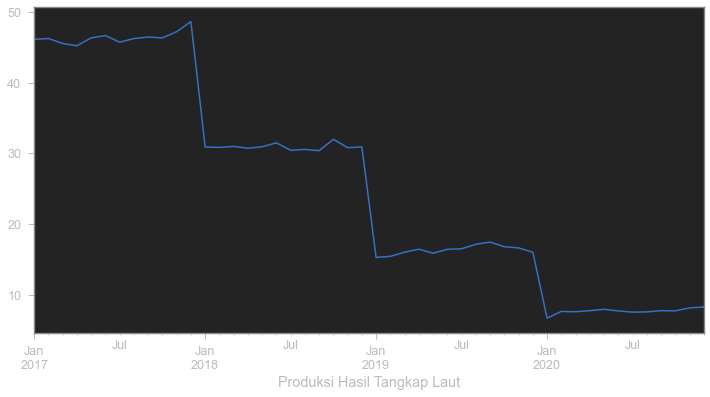

In [3]:
data['Tongkol'].plot(figsize=(12,6));

## 3. Check Stationarity Data

In [4]:
# augmented dickey-fuller test function
def adfuller_test(series):
    """
    Pass time series, returns ADF report
    """
    print("Augmented Dickey-Fuller Test:")
    result = adfuller(series.dropna())
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    output = pd.Series(result[:4], index=labels)
    
    for key,val in result[4].items():
        output[f'critical value ({key})'] = val
    print(output.to_string())
    
    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Accept the null hypothesis")
        print("Data has a unit root and is non-stationary")

# try in our data
adfuller_test(data['Tongkol'])

Augmented Dickey-Fuller Test:
ADF test statistic      -1.041304
p-value                  0.737903
# lags used              0.000000
# observations          47.000000
critical value (1%)     -3.577848
critical value (5%)     -2.925338
critical value (10%)    -2.600774

Weak evidence against the null hypothesis
Accept the null hypothesis
Data has a unit root and is non-stationary


Data is NON-stationary! Lakukan differencing

## 4. Differencing

In [5]:
data['Tongkol d1'] = diff(data['Tongkol'], k_diff=1)     #lag 1
# cek stationarity again
adfuller_test(data['Tongkol d1'])

Augmented Dickey-Fuller Test:
ADF test statistic     -6.727587e+00
p-value                 3.358976e-09
# lags used             1.000000e+01
# observations          3.600000e+01
critical value (1%)    -3.626652e+00
critical value (5%)    -2.945951e+00
critical value (10%)   -2.611671e+00

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Data is STATIONARY!

Karena dilakukan differencing, modelnya adalah ARIMA/SARIMA

## 5. Check Seasonality Data

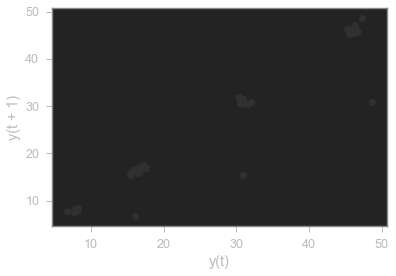

In [6]:
# With lag plot
lag_plot(data['Tongkol']);

terlihat trend dan seasonality

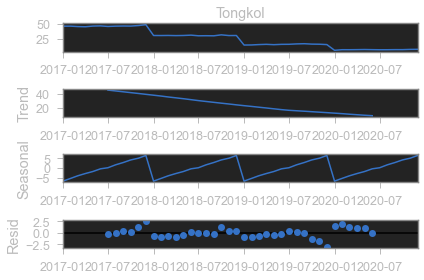

In [7]:
# With ETS (Error, Trend, Seasonality)
result = seasonal_decompose(data['Tongkol'].dropna(), model='add')  # model='add' for linear
result.plot();

ADA SEASONALITY, maka gunakan SARIMA MODEL

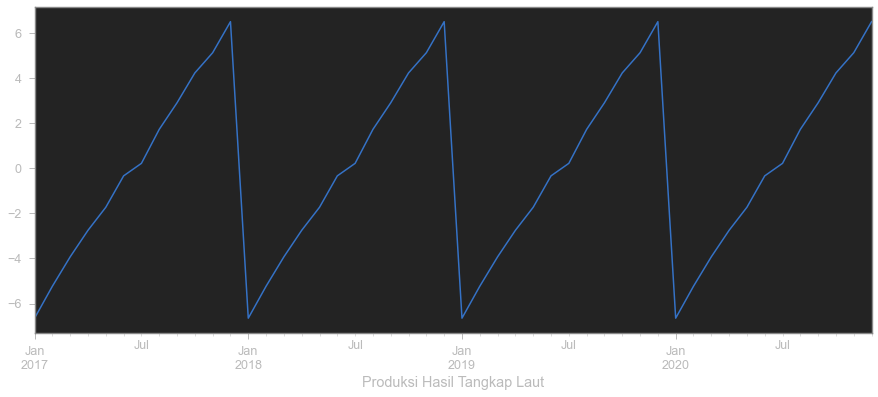

In [8]:
# lihat range seasonalitynya
result.seasonal.plot(figsize=(15,6));

sesoanality terjadi setiap tahun --> m=12

## 6. Find (p,d,q)(P,D,Q)SARIMA Model

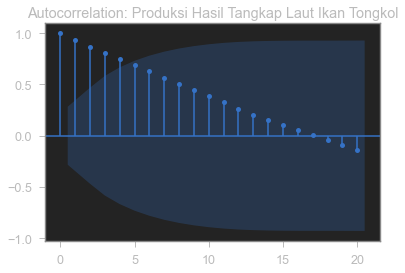

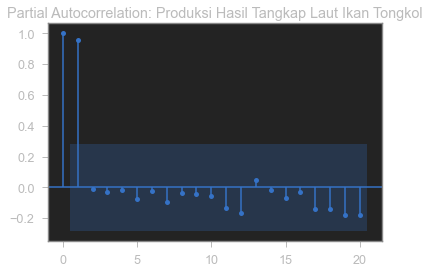

In [9]:
# Plot ACF
lags = 20
title = 'Autocorrelation: Produksi Hasil Tangkap Laut Ikan Tongkol'
plot_acf(data['Tongkol'],title=title,lags=lags);
# PLOT PACF
lags = 20
title = 'Partial Autocorrelation: Produksi Hasil Tangkap Laut Ikan Tongkol'
plot_pacf(data['Tongkol'],title=title,lags=lags);

In [10]:
# autoarima
auto_arima(data['Tongkol'], seasonal=True, stationary=False, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=200.901, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=259.232, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=259.453, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=201.144, Time=0.82 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=2.58 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=199.039, Time=1.46 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

Karena (p,q) = (0,0) gabisa maka lihat penentuan berikut:

> <em>If the PACF of a differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive, while the ACF decays more slowly--then consider adding an **AR** terms to the model. Meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. The lag at which the PACF cuts off is indicated number of AR terms.</em><br>

Karena terjadi hal tsb, maka gunakan AR(1) dan MA(0)/MA(1). Untuk MA, lihat yg memiliki less error. Ternyata SARIMA(1,1,0)(2,0,0,12) memiliki less error. Maka gunakan SARIMA(1,1,0)(2,0,0,12)

## 7. Split Data

In [11]:
# Ingin memprediksi 6 bulan berikutnya
train_data = data['Tongkol'].iloc[:-6]
test_data = data['Tongkol'].iloc[-6:]

train_data, test_data

(Produksi Hasil Tangkap Laut
 2017-01-01    46.12
 2017-02-01    46.23
 2017-03-01    45.53
 2017-04-01    45.21
 2017-05-01    46.32
 2017-06-01    46.65
 2017-07-01    45.71
 2017-08-01    46.23
 2017-09-01    46.44
 2017-10-01    46.32
 2017-11-01    47.20
 2017-12-01    48.61
 2018-01-01    30.92
 2018-02-01    30.86
 2018-03-01    31.00
 2018-04-01    30.74
 2018-05-01    30.95
 2018-06-01    31.50
 2018-07-01    30.45
 2018-08-01    30.57
 2018-09-01    30.40
 2018-10-01    32.00
 2018-11-01    30.82
 2018-12-01    30.93
 2019-01-01    15.32
 2019-02-01    15.48
 2019-03-01    16.07
 2019-04-01    16.49
 2019-05-01    15.92
 2019-06-01    16.47
 2019-07-01    16.55
 2019-08-01    17.18
 2019-09-01    17.49
 2019-10-01    16.84
 2019-11-01    16.67
 2019-12-01    16.06
 2020-01-01     6.75
 2020-02-01     7.70
 2020-03-01     7.66
 2020-04-01     7.81
 2020-05-01     8.00
 2020-06-01     7.77
 Freq: MS, Name: Tongkol, dtype: float64,
 Produksi Hasil Tangkap Laut
 2020-07-01    7.6

## 8. SARIMA Train Model

SARIMA(1,1,0)(2,0,0,12)

In [12]:
# model SARIMA in train data
model_train_SARIMA = SARIMAX(train_data, order=(1,1,0), seasonal_order=(2,0,0,12)).fit()
model_train_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Tongkol   No. Observations:                   42
Model:             SARIMAX(1, 1, 0)x(2, 0, 0, 12)   Log Likelihood                 -84.001
Date:                            Sun, 12 Dec 2021   AIC                            176.002
Time:                                    20:30:40   BIC                            182.856
Sample:                                01-01-2017   HQIC                           178.498
                                     - 06-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1862      0.236     -0.789      0.430      -0.649       0.276
ar.S.L12       1.5346      0.077     20.028      0.000       1.384       1.685
ar.S.L24      -0.7530      0.093     -8.136      0.000      -0.934      -0.572
sigma2         1.4097      0.404      3.492      0.000       0.618       2.201
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               220.11
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -2.69
Prob(H) (two-sided):                  0.41   Kurtosis:                        13.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 9. Test Prediction

In [13]:
start=len(train_data)
end=len(train_data)+len(test_data)-1

prediction_test = model_train_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(2,0,0,12) Prediction')
prediction_test

2020-07-01     8.806258
2020-08-01     9.659816
2020-09-01    10.267804
2020-10-01     8.064753
2020-11-01     8.692544
2020-12-01     7.673589
Freq: MS, Name: SARIMA(1,1,0)(2,0,0,12) Prediction, dtype: float64

Digunakan typ='levels' krn ingin melihat hasil prediksi dari data asli, bukan data yg sudah didifferencing

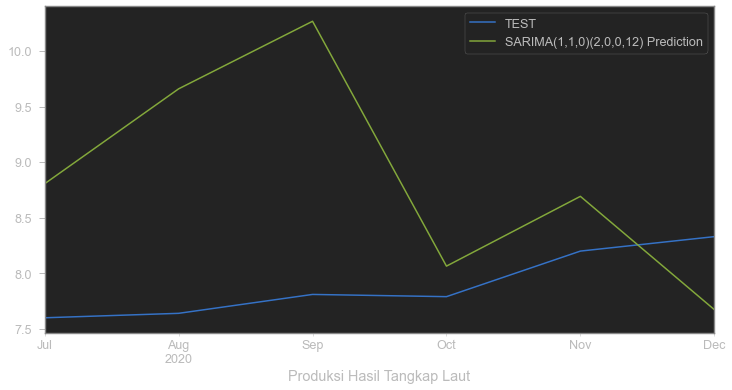

In [14]:
# PLOT
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

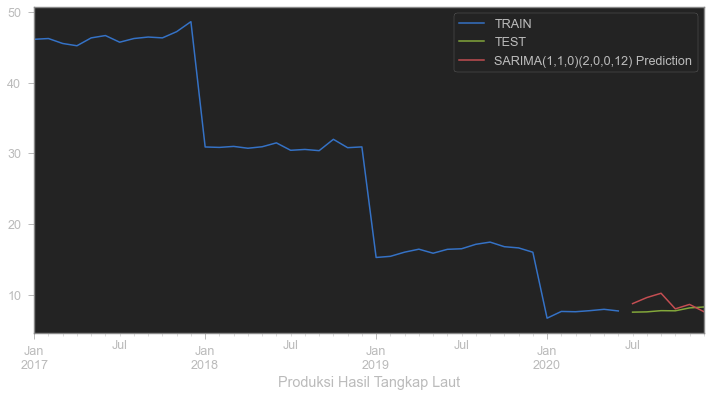

In [15]:
# PLOT
train_data.plot(legend=True, label='TRAIN')
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

Kalau diliat, tiap menjelang akhir tahun sebelum turun drastis, Juli kebawah itu suka ada tingkatan di ujungnya, maka make sense model predict ada tingkatan di July 2020 kebawah

## 10. Evaluate Model

In [16]:
print('Mean Train data -->', train_data.mean())
print('Standard Deviation Train data -->', train_data.std())
print('\n')

error = rmse(test_data, prediction_test)
print(f'ARIMA(1,1,0) RMSE Error: {error:11.10}')
aic_values = model_train_SARIMA.aic
print(f'ARIMA(1,1,0) AIC: {aic_values:6.5}')
print('\n')

print('Mean Test data -->', test_data.mean())
print('Mean Prediction results -->', prediction_test.mean())

Mean Train data --> 27.855714285714292
Standard Deviation Train data --> 14.216457337657982


ARIMA(1,1,0) RMSE Error: 1.433206167
ARIMA(1,1,0) AIC:  176.0


Mean Test data --> 7.894999999999999
Mean Prediction results --> 8.86079403325251


Rata-rata train data itu 28, prediksinya menyimpang 1.4 (RMSE). Standar deviasi (statistik yang mengukur penyebaran kumpulan data relatif terhadap rata-rata) train data itu 14, prediksinya menyimpang 1.4 (RMSE). Artinya error tidak menyimpang statistik pada data. Bisa dilihat juga Mean prediction results hampir mirip dgn mean test data. This is good prediction!

## 11. Re-Fit Model to Entire Dataset

In [17]:
model_SARIMA = SARIMAX(data['Tongkol'], order=(1,1,0), seasonal_order=(2,0,0,12)).fit()
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Tongkol   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(2, 0, 0, 12)   Log Likelihood                 -93.253
Date:                            Sun, 12 Dec 2021   AIC                            194.506
Time:                                    20:30:41   BIC                            201.907
Sample:                                01-01-2017   HQIC                           197.291
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1228      0.268     -0.458      0.647      -0.649       0.403
ar.S.L12       1.4094      0.136     10.340      0.000       1.142       1.677
ar.S.L24      -0.5544      0.147     -3.779      0.000      -0.842      -0.267
sigma2         1.6513      0.458      3.607      0.000       0.754       2.549
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               218.09
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -2.20
Prob(H) (two-sided):                  0.55   Kurtosis:                        12.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 12. Forecasting The Future

In [18]:
# forecasting the next 6 months
start = len(data)
end = len(data)+5

forecast = model_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(2,0,0,12) Forecast')
forecast

2021-01-01    3.734059
2021-02-01    5.000148
2021-03-01    4.614705
2021-04-01    4.593493
2021-05-01    5.177282
2021-06-01    4.548179
Freq: MS, Name: SARIMA(1,1,0)(2,0,0,12) Forecast, dtype: float64

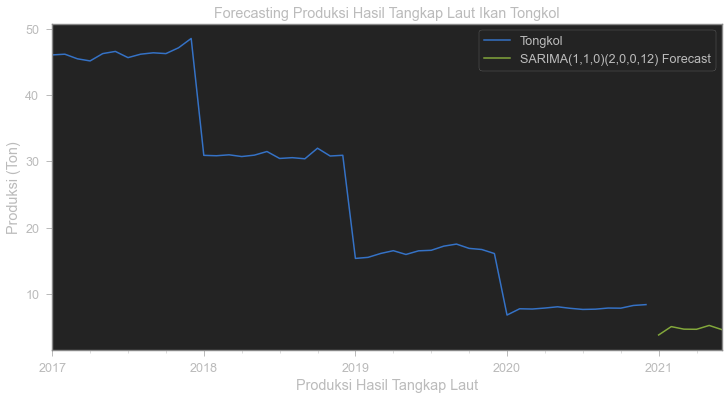

In [19]:
# PLOT
data['Tongkol'].plot(legend=True)
forecast.plot(figsize=(12,6), legend=True, title='Forecasting Produksi Hasil Tangkap Laut Ikan Tongkol', ylabel='Produksi (Ton)');

Look! Prediksinya turun karena ada seasonality bahwa setiap tahun akan turun nilainya

In [20]:
# save model
model_SARIMA.save('model_tongkol.pkl')